In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df=pd.read_csv("haberman.csv")

In [51]:
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [7]:
df.shape  #so the no. of points are 306 and no. of features are 3

(305, 4)

In [8]:
df.columns  #

Index(['30', '64', '1', '1.1'], dtype='object')

In [ ]:
# Attribute Information:

# column[0]: Age of patient at time of operation (numerical)
# column[1]: Patient's year of operation (year - 1900, numerical)
# column[2]: Number of positive auxillary nodes detected (numerical)
# column[3]: Survival status (class attribute) 1 = the patient survived 5 years or longer , 2 = the patient died within 5 year

In [47]:
df['1.1'].value_counts()  #Imbalanced dataset 
                #There are two classes '1','2'.
                # No. of datapoints belonging to '1' are 224 i.e 224 patients survived 5 years or longer
                # No. of datapoints belonging to '2' are 81 i.e 81 patients died within 5 year

1    224
2     81
Name: 1.1, dtype: int64

In [ ]:
# OBJECTIVE

Our objective is to find either the patient belong to the "patient survived 5 years or longer" or "he died within 5 year"
We are to predict column[3] by the given dataset
and column[2] will be the play the most important role in finding out our conclusion

In [ ]:
#Univariate Analysis 

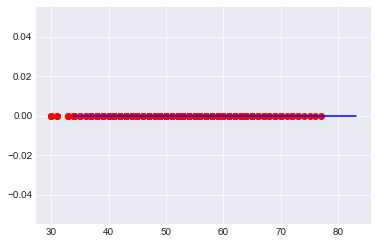

In [70]:
import numpy as np
survived=df.loc[df["1.1"] == 1]
died=df.loc[df["1.1"] == 2]
plt.plot(survived['30'],np.zeros_like(survived['30']),'ro')
plt.plot(died['30'],np.zeros_like(died['30']),'b')
plt.show()

In [ ]:
if age<33:
    patient survived
if age>78:
    patient died
and due to overlapping we cannot depict for age>33 and age<78

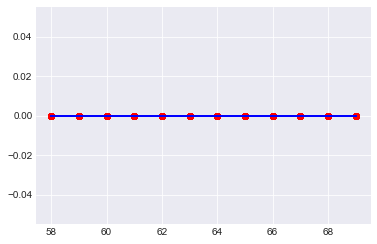

In [71]:
import numpy as np
survived=df.loc[df["1.1"] == 1]
died=df.loc[df["1.1"] == 2]
plt.plot(survived['64'],np.zeros_like(survived['30']),'ro')
plt.plot(died['64'],np.zeros_like(died['30']),'b')
plt.show()

In [ ]:
#patient's year of operation can not be a good option to select for univariate analysis

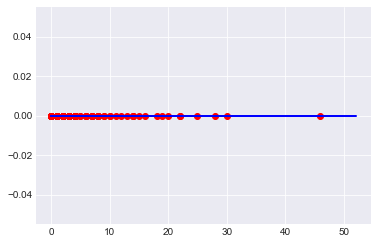

In [72]:
import numpy as np
survived=df.loc[df["1.1"] == 1]
died=df.loc[df["1.1"] == 2]
plt.plot(survived['1'],np.zeros_like(survived['30']),'ro')
plt.plot(died['1'],np.zeros_like(died['30']),'b')
plt.show()

In [ ]:
if Number of positive auxillary nodes detected > 30:
    then the patient died

In [ ]:
So to choose "1" i.e 'Number of positive auxillary nodes detected' is the perfect univariate.

In [100]:
#PDF

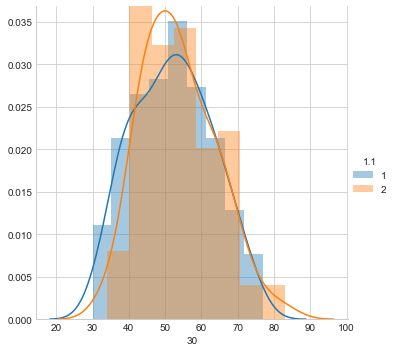

In [103]:
sns.FacetGrid(df,hue='1.1',size=5).map(sns.distplot,'30').add_legend()
plt.show()  #There's a lot of overlapping in it

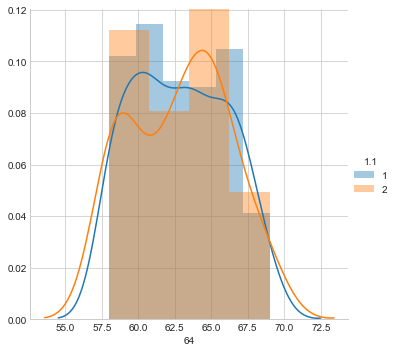

In [105]:
sns.FacetGrid(df,hue='1.1',size=5).map(sns.distplot,'64').add_legend()
plt.show()  #There's a lot of overlapping in it

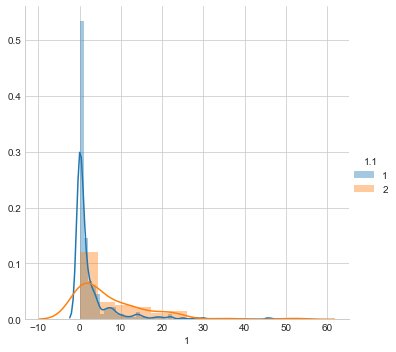

In [109]:
sns.FacetGrid(df,hue="1.1",size=5).map(sns.distplot,'1').add_legend()
plt.show()

In [ ]:
# PDF,CDF

In [73]:
counts,bin_edges=np.histogram(survived['1'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-")
plt.plot(bin_edges[1:],cdf,"r*-")

counts,bin_edges=np.histogram(died['1'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"go-")
plt.plot(bin_edges[1:],cdf,"g*-")


[ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


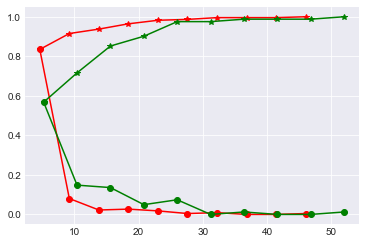

In [74]:
sns.set_style("darkgrid")
plt.show()

In [ ]:
if Number of positive auxillary nodes detected > 46:
    Patient died

In [ ]:
# boxplot

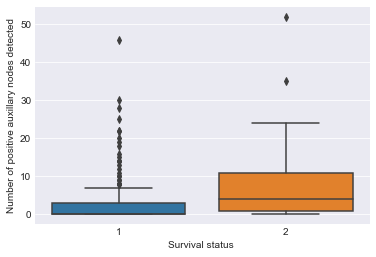

In [79]:
sns.boxplot(x='1.1',y='1',data=df)
plt.xlabel('Survival status ')
plt.ylabel('Number of positive auxillary nodes detected')
plt.show()

In [ ]:
There are 50% of the died patients who had Number of positive auxillary nodes detected < 4
There are 75% of the survived patients who had Number of positive auxillary nodes detected < 4

In [ ]:
if we consider the blue box fully,then  the readings are as follows

if auxiliary nodes< 4:
    Patient belongs to category 1
else:
    Patient belongs to category 2
    
if we consider the blue box fully,then there will be almost around 40% error

In [ ]:
# violinplot

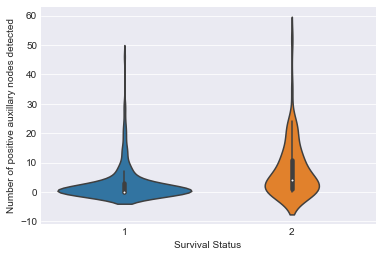

In [80]:
sns.violinplot(x='1.1',y='1',data=df,size=10)
plt.xlabel("Survival Status")
plt.ylabel('Number of positive auxillary nodes detected')
plt.show()

In [ ]:
# Bell curve of survived patients is more as compared to died patients

In [ ]:
#Bivariate Analysis

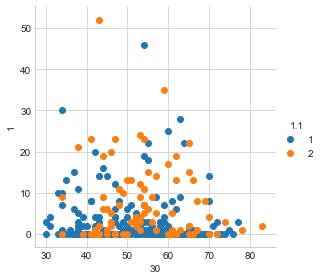

In [81]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='1.1',size=4).map(plt.scatter,'30','1').add_legend()
plt.show()

In [ ]:
if age<40:
    patient survived
and we can not seperate for age>40

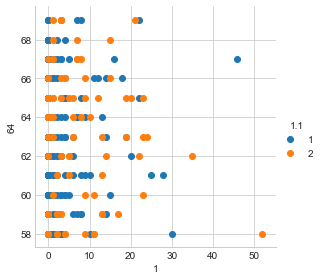

In [85]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='1.1',size=4).map(plt.scatter,'1','64').add_legend()
plt.show()

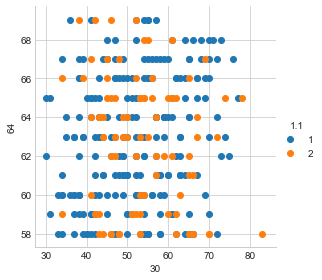

In [87]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='1.1',size=4).map(plt.scatter,'30','64').add_legend()
plt.show()

In [ ]:
if age<40 and age>70:
    patient survived

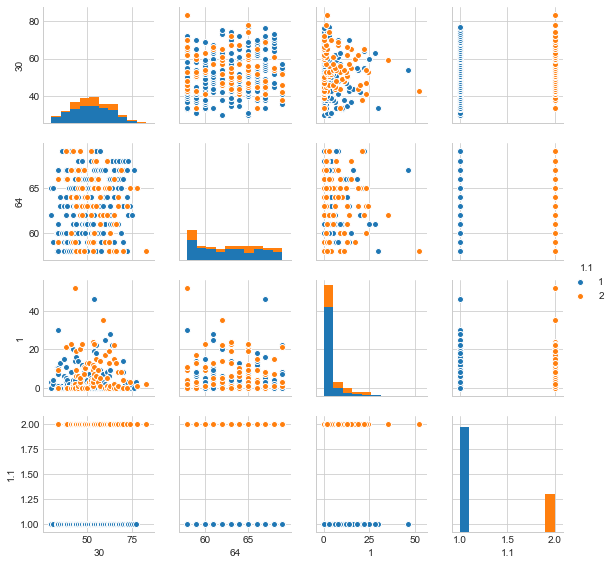

In [97]:
plt.close()
sns.pairplot(df,hue="1.1",size=2)
plt.show()

In [99]:
# the data is inseperable via pair plot